DSCI 100 Group Project Proposal - Group 27<br />
-- by Jeyah Cruz, Sofia Saucedo, Jingyuan Liu & Brett Baumgartner

Raisin Dataset - Classification For Different Types of Raisin

In [1]:
### Load all necessary packages and settings. Run this cell before continuing.
library(tidyverse)
library(tidymodels)
library(gridExtra)
library(repr)
library(cowplot)
set.seed(27)
options(repr.matrix.max.rows = 8)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

⚫ Introduction:

We will be using a raisin dataset that contains 900 observations, with a 50/50 split of two different raisin classes (Kecimen and Besni) along with 7 morphological features of each raisin. 

★Column Variables Definitions: <br />
Area: number of pixels of the surface area formed by the raisin.<br />
Major Axis Length: length of the longest line that can be drawn on the raisin.<br />
Minor Axis Length: length of the shortest line that can be drawn on the raisin.<br />
Eccentricity: eccentricity of the ellipse.<br />
Convex Area: number of pixels of the smallest convex shell of the region formed by the raisin.<br />
Extent: the ratio of the region formed by the raisin grain to the total pixels in the bounding box.<br />
Perimeter: the length of the continuous line forming the boundary of a raisin.<br />

The question we are trying to answer is:
Given the area, perimeter and convex area of a new given observation, is the raisin classified as Kecimen or Besni given the data we have from the dataset?

⚫ Preliminary exploratory data analysis:

Clean and tidy dataset read from the web

In [2]:
#Read the data from the web using its url.
url <- "https://raw.githubusercontent.com/ljy0401/DSCI-100-Group-Project-Group-27/main/raisin_dataset.csv"
raisin_data_original <- read_csv(url)  
raisin_data_original

#Select the class and all predictors columns.
raisin_data_selected <- raisin_data_original %>% select(Area, ConvexArea, Perimeter, Class)
raisin_data_selected

Parsed with column specification:
cols(
  Area = col_double(),
  MajorAxisLength = col_double(),
  MinorAxisLength = col_double(),
  Eccentricity = col_double(),
  ConvexArea = col_double(),
  Extent = col_double(),
  Perimeter = col_double(),
  Class = col_character()
)



Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
87524,442.2460,253.2912,0.8197384,90546,0.7586506,1184.040,Kecimen
75166,406.6907,243.0324,0.8018052,78789,0.6841296,1121.786,Kecimen
90856,442.2670,266.3283,0.7983536,93717,0.6376128,1208.575,Kecimen
45928,286.5406,208.7600,0.6849892,47336,0.6995994,844.162,Kecimen
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
87350,440.7357,259.2931,0.8086290,90899,0.6364762,1214.252,Besni
99657,431.7070,298.8373,0.7216841,106264,0.7410985,1292.828,Besni
93523,476.3441,254.1761,0.8457385,97653,0.6587983,1258.548,Besni
85609,512.0818,215.2720,0.9073454,89197,0.6320200,1272.862,Besni


Area,ConvexArea,Perimeter,Class
<dbl>,<dbl>,<dbl>,<chr>
87524,90546,1184.040,Kecimen
75166,78789,1121.786,Kecimen
90856,93717,1208.575,Kecimen
45928,47336,844.162,Kecimen
⋮,⋮,⋮,⋮
87350,90899,1214.252,Besni
99657,106264,1292.828,Besni
93523,97653,1258.548,Besni
85609,89197,1272.862,Besni


Dataset Summary:  

In [3]:
#The dataframe tb includes a summary of the atributes of the raisins dataset.
tb <- tibble(
  `#Observations` = c("900", "", "" ),  `#Variables` = c(7,"" ,"" ), 
  ` Classes` = c("Kecimen (450)", "Besni (450)", "" ),
    `Selected_Variables` = c("Area", "Convex Area", "Perimeter"))
tb

#The df raisin_data_cal displays the average, minimum and maximum from both classes for the three predictors.
raisin_data_cal <- raisin_data_selected %>% group_by(Class) %>%
summarize(Avg_Area=mean(Area),Min_Area= min(Area), Max_Area=max(Area), 
Avg_Perimeter= mean(Perimeter),Min_Perimeter= min(Perimeter), Max_Perimeter=max(Perimeter), 
Avg_Convex= mean(ConvexArea), Min_Convex= min(ConvexArea), Max_Convex=max(ConvexArea) )
raisin_data_cal

raisins_data_scatter <- raisin_data_selected %>% pivot_longer(cols=Area: ConvexArea, names_to= "Type_Area",
                                                              values_to="Area")

#Observations,#Variables,Classes,Selected_Variables
<chr>,<chr>,<chr>,<chr>
900,7,Kecimen (450),Area
,,Besni (450),Convex Area
,,,Perimeter


`summarise()` ungrouping output (override with `.groups` argument)



Class,Avg_Area,Min_Area,Max_Area,Avg_Perimeter,Min_Perimeter,Max_Perimeter,Avg_Convex,Min_Convex,Max_Convex
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Besni,112194.79,40702,235047,1348.1270,771.797,2697.753,116675.82,41924,278217
Kecimen,63413.47,25387,180898,983.6862,619.074,2253.557,65696.36,26139,221396


Visualization of the Raisin dataset: Both a set of histograms and a scatter plot of the predictors are shown, distinguishing between the classes with the filling color.

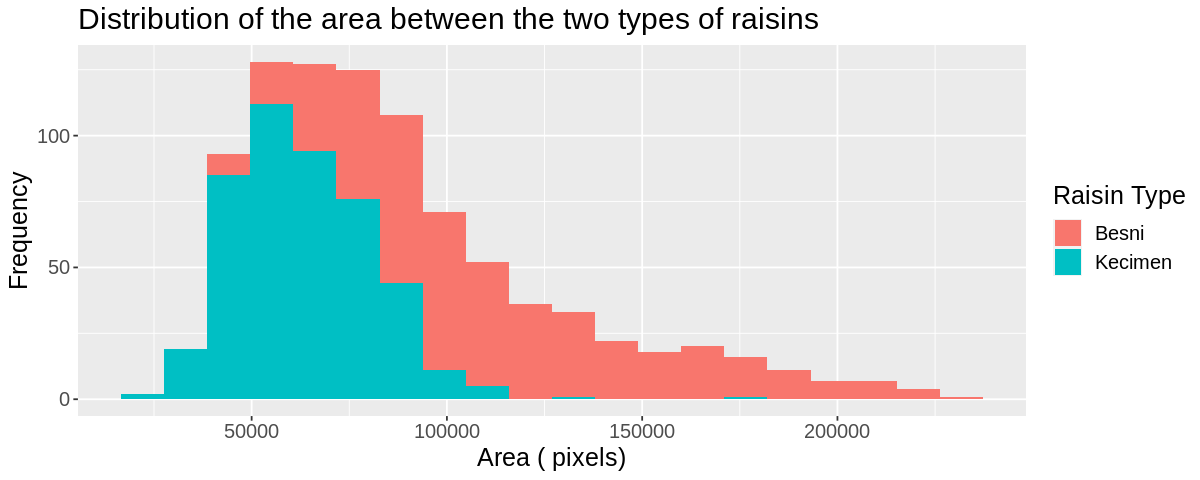

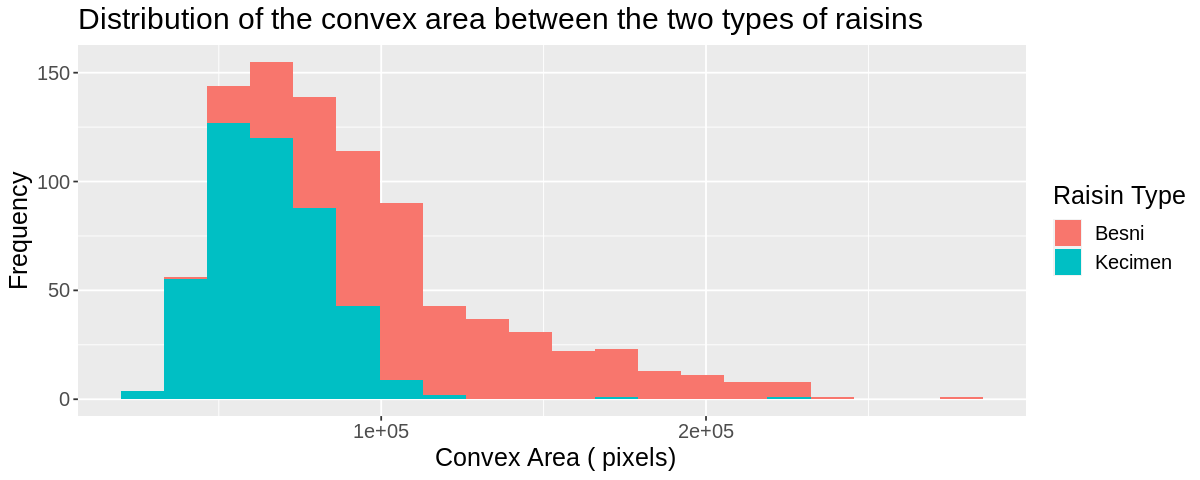

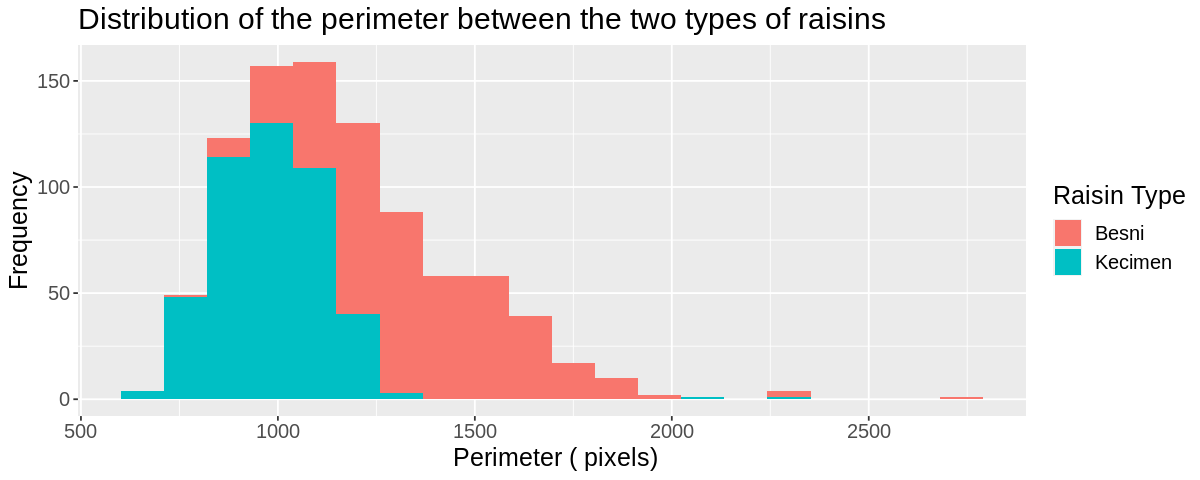

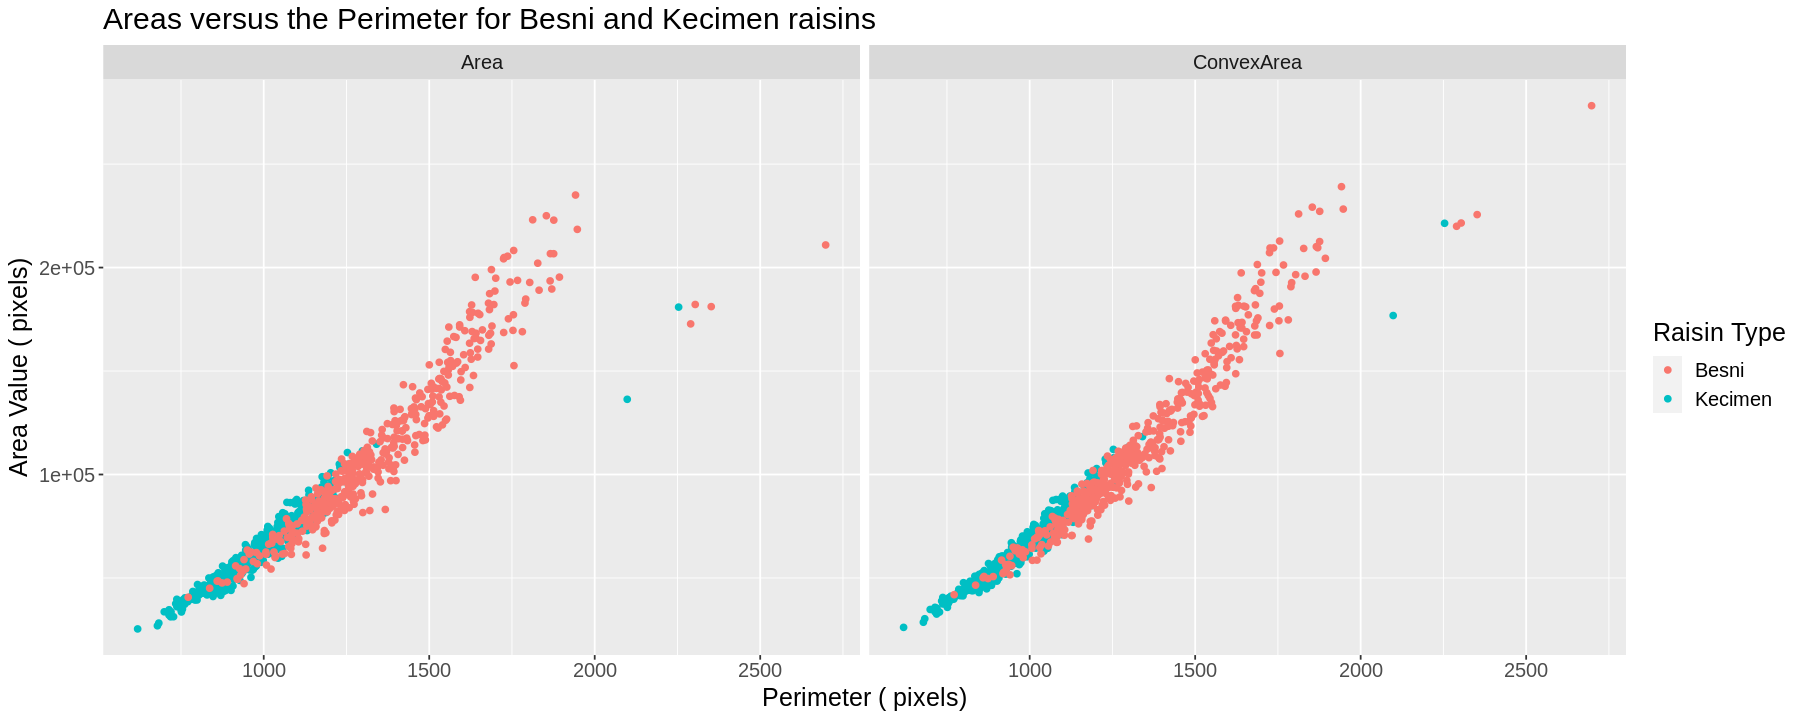

In [4]:
options(repr.plot.width = 10, repr.plot.height = 4) 

area_plot <- raisin_data_selected %>% ggplot(aes(x=Area)) +
    geom_histogram(aes(fill=Class), bins=20) +
labs(x="Area ( pixels)",y= "Frequency", fill="Raisin Type")+ 
theme(text = element_text(size = 15))+ggtitle("Distribution of the area between the two types of raisins")

convex_plot <- raisin_data_selected %>% ggplot(aes(x=ConvexArea)) +
    geom_histogram(aes(fill=Class), bins=20) +
labs(x=" Convex Area ( pixels)",y= "Frequency", fill="Raisin Type")+ 
theme(text = element_text(size = 15)) +
ggtitle("Distribution of the convex area between the two types of raisins")

perimeter_plot <- raisin_data_selected %>% ggplot(aes(x=Perimeter)) +
    geom_histogram(aes(fill=Class), bins=20) +
labs(x=" Perimeter ( pixels)",y= "Frequency", fill="Raisin Type")+ 
theme(text = element_text(size = 15)) +
ggtitle("Distribution of the perimeter between the two types of raisins")

area_plot
convex_plot
perimeter_plot

options(repr.plot.width = 15, repr.plot.height = 6) 
scatter_raisin <- raisins_data_scatter %>% ggplot(aes(x=Perimeter, y=Area)) +
    geom_point(aes(colour=Class)) +
labs(x="Perimeter ( pixels)", y= "Area Value ( pixels)", colour="Raisin Type")+
facet_grid(. ~ Type_Area) +
theme(text = element_text(size = 15)) + ggtitle("Areas versus the Perimeter for Besni and Kecimen raisins")

scatter_raisin 

⚫ Methods:

After reading the .csv dataset file into R, we first select the perimeter, area, and convex area columns as our predictor variables and the class column as our categorical variable (target). In order to keep the computation time and process manageable and neglect variables that do not do well in classifying two types of raisin (two classes have large overlapping areas), we will drop other columns at this point. In order to actually make predictions for new observations, we will use the K-nearest neighbors classification algorithm. Next, we plan to randomly split the whole dataset into a training dataset with 75% and a testing dataset with 25%. We then need to create the KNN model and the recipe. It is important to notice that both classes have a relatively balancing amount of observations, but the scale of each predictor varies significantly. In order to avoid the prediction being dominated by one variable, we will add scale and center steps to our recipe. Besides, instead of randomly assigning the K-neighbors value, we decide to perform cross-validation and tune the classifier to find the best K which gives us the highest accuracy. Finally, we can add the recipe and tuned model to the workflow and fit it to our training dataset. Then we can use it to predict the class of our testing dataset observations and compute the true accuracy of these predictions.

To visualize the prediction, we would have to limit the predictors to two variables since a 3-dimension plot is generally not recommended in this course. We can create a colored prediction map (scatter plot) by creating a grid of synthetic new observations, with one predictor on x-axis and the other on y-axis, using colors to distinguish different types of raisin.

⚫ Expected outcomes and significance:

What do you expect to find?
Using the perimeter, area, and convex area columns of the dataset, we expect to classify a new raisin observation as either Kecimen or Besni.

What impact could such findings have?
These findings can further support the efficiency of using machine learning in order to classify a new observation using a dataset.
Individuals who have specific dietary restrictions or preferences are able to classify between different raisins or other types of foods by using physical features. 

What future questions could this lead to?
When using more or fewer predictors, would the raisin classification still be the same?